<a href="https://colab.research.google.com/github/russburns/Neutrino_Pion_Statistics/blob/main/FermiLab_Neutrino_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pion and Neutrino Statistics
Russell Burns, Michael Campagna, James St. Martin, Ben Steinman, Kevin Su

# Preamble

In [73]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import numpy.ma as ma
import scipy.optimize as optimize
from matplotlib.patches import Ellipse

# Abstract

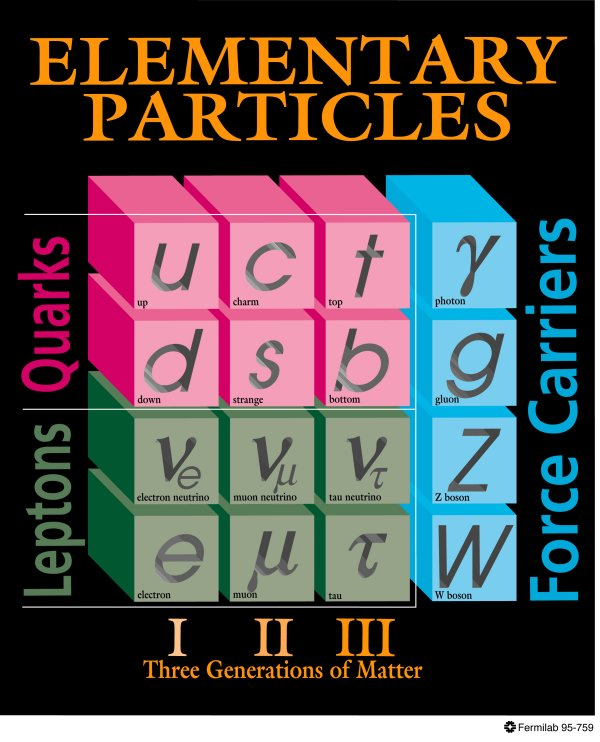

The team analyzed the behavior of neutrinos from a Fermilab experiment. We began the project with a look at the quantum ramifications of neutrino creation. We then read in and analyzed energy values of neutrinos from a Monte-Carlo (MC) simulation. We compared these results to real Neutrino data prvided by our professor from Fermilab. We used the real data and the two-flavor oscillation formula to draw statistical conclusions about the mixing angle and change in mass of the sample.

# Neutrino Background and Pion Decay Length

###A beam of neutrinos

Neutrinos consist of a group of three fermions ("flavors"): muon neutrinos $\nu_\mu$, tau neutrinos $\nu_\tau$, and electron neutrinos $\nu_e$. They are studied in high energy environments due to their exceptionally quick speeds, low masses, and low levels of interactivity with ordinary matter. The circumstances in which these flavors emerge are equally as interesting:
* Pions $\pi^+$ are a type of meson that decay into muons $\mu$ and $\nu_\mu$, which are leptons. Interestingly, muons can also decay into muon neutrinos.
* Tau leptons can decay into $\nu_\tau$
* $\nu_e$ are created as part of the radiation emitted during beta plus decay.

What even defines a flavor is not a solid question when compared to other particles, as all flavors are in a superposition of three mass states. One neutrino flavor can also oscillate into another neutrino flavor if observed later (a consequence of their neutrality).

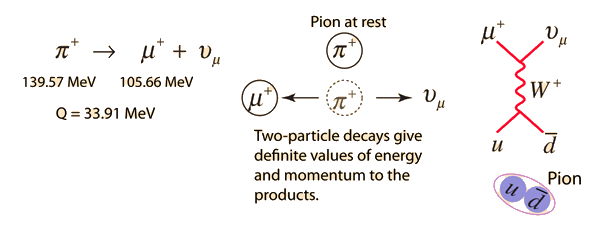

Fermilab in Illinois is a high-energy particle physics lab with robust neutrino experimentation infastructure. In fact, Fermilab creates their own $\nu_\mu$! This creation is accomplished by their "NuMI" beam, which takes in high energy protons and smashes them into graphite. These collisions create pions, which become the $\nu_\mu$ source. Every day, the beam produces roughly 8e17 $\nu_\mu$.

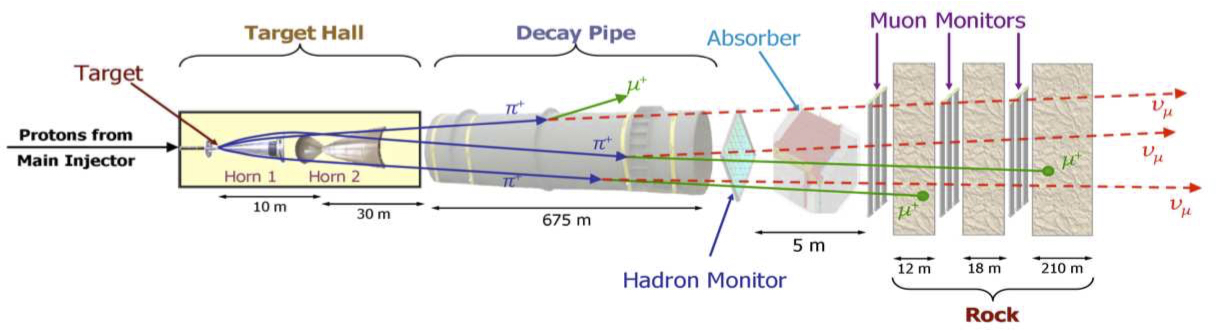

https://www.hep.ucl.ac.uk/nova/beam.shtml

### Pion decay length

Since a pion's instability is to essential to $\nu_\mu$ creation, the team was curious about the rationale behind the decay pipe's length. We decided to plot the average decay length of a $\pi^+$ vs its momentum. We found that, for a reasonable monentum range of 0.5 GeV/c to 10 GeV/c, the decay pipe provides plenty of length for $\nu_\mu$ creation.




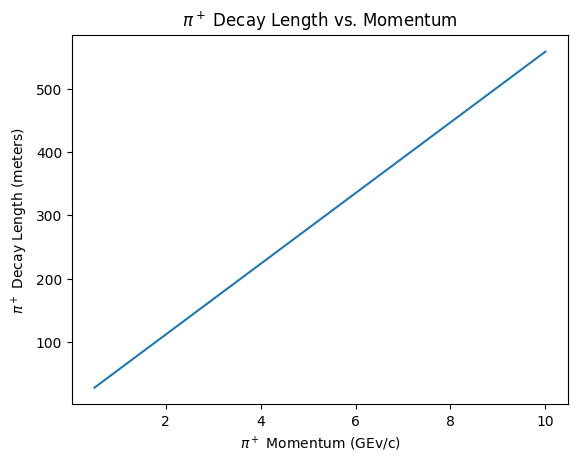

In [74]:
from re import L
#one light-nanosecond = 0.2998 m

#distance = vt = vDt0 /sqrt(1 - (v2/c2))
#where pion speed is a fraction of c,

def decay_length(p):
 c = 1
 m = 0.13957
   # in Gev/C^2, for a charged pion
 Dt0 = 2.6e-8
   # in seconds, the decay time from our reference of a pion
 v = ( (p/m)**2 / (1 + ( (p/m)**2 / (c)**2 ) ) )**0.5
   # as a fraction of c, velocity
 l = v*Dt0*((1-(v**2/c**2))**-.5)
 return l, v

momrange = np.linspace(.5,10,1000)
l = decay_length(momrange)[0]*299792458
plt.plot(momrange,l)
plt.ylabel('$\\pi^+$ Decay Length (meters)')
plt.xlabel('$\\pi^+$ Momentum (GEv/c)')
plt.title('$\\pi^+$ Decay Length vs. Momentum');

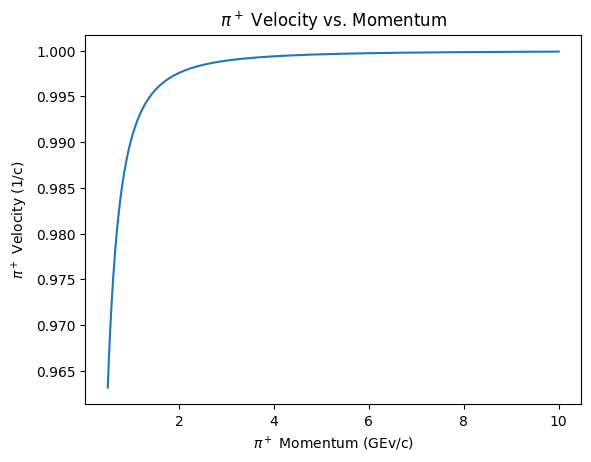

In [75]:
p = decay_length(momrange)[1]
plt.plot(momrange,p)
plt.ylabel('$\\pi^+$ Velocity (1/c)')
plt.xlabel('$\\pi^+$ Momentum (GEv/c)')
plt.title('$\\pi^+$ Velocity vs. Momentum');

# Neutrino Energy Data

Fermilab directs the $\nu_\mu$ beam 735km away to a 5400 ton iron detector in Minnesota.

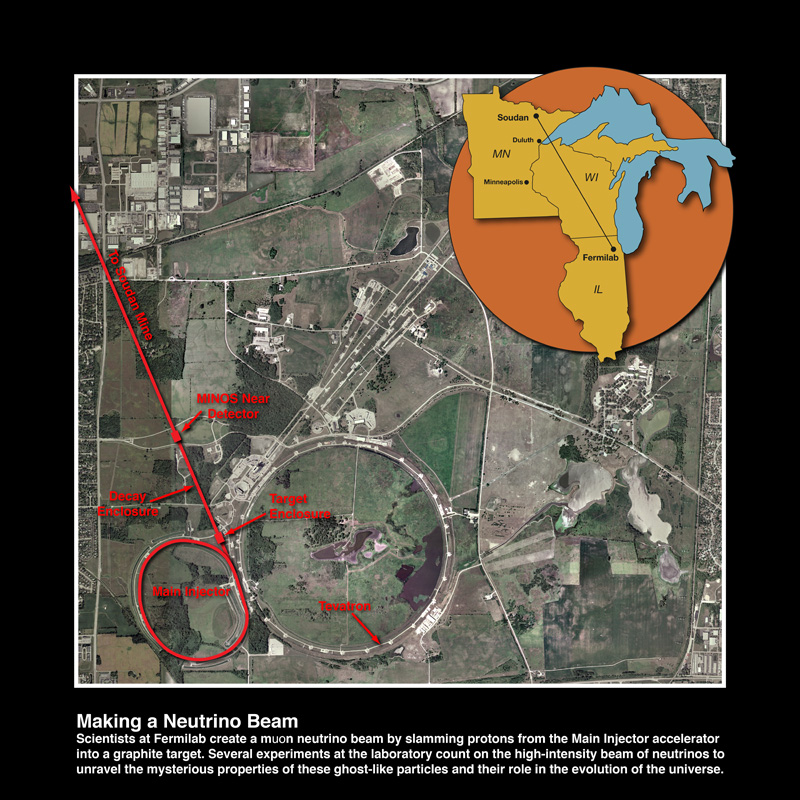

This detector usually only sees around 1-2 $\nu_\mu$ per day, relative to the quadrillions sent out by Fermilab. Neutrinos only interact with matter via gravity or the weak nuclear force. More specifically, neutrinos only interact with charged quarks through W bosons. Protons are made up of 2 up quarks and 1 down quark, meaning cheap, heavy nuclei elements like iron (Z = 26) are good candidates for decectors---hence why this detector is iron. The detector observes the energy lost as a byproduct of these $\nu_\mu$ interactions (as well as the lepton it leaves behind). Any energy lost dissipates near an internal plastic scintillator, which fluoresces upon absorption. This light is recorded using photomultiplier tubes, and the system directly maps the energy reading from there.

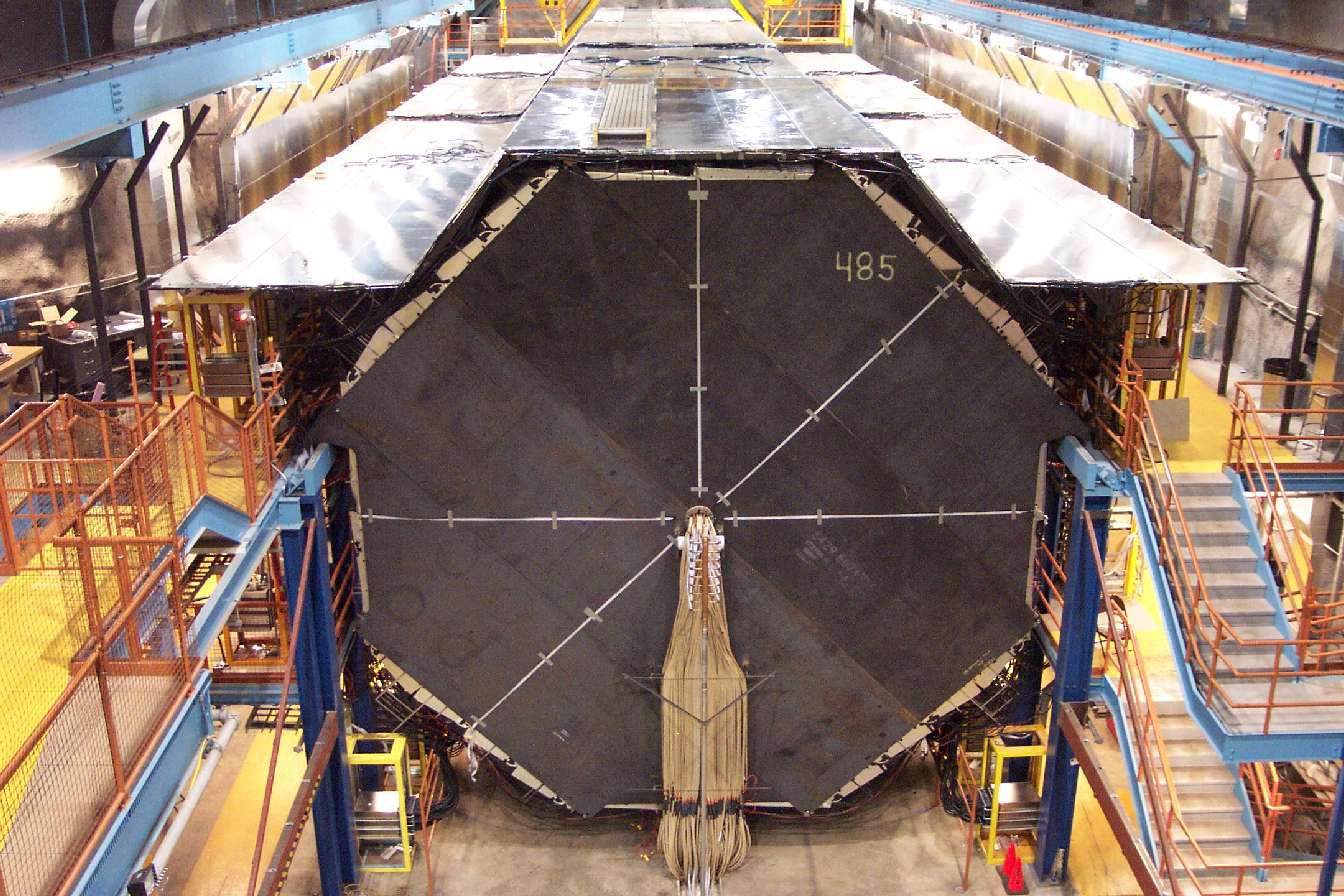

A $\nu_\mu$ detection is shown below. The scintillator is divided into 4cm wide bars, which are oriented $\pm 45^\circ$ to the vertical to get better angles on the interaction. The dots mark the scintillator bars.

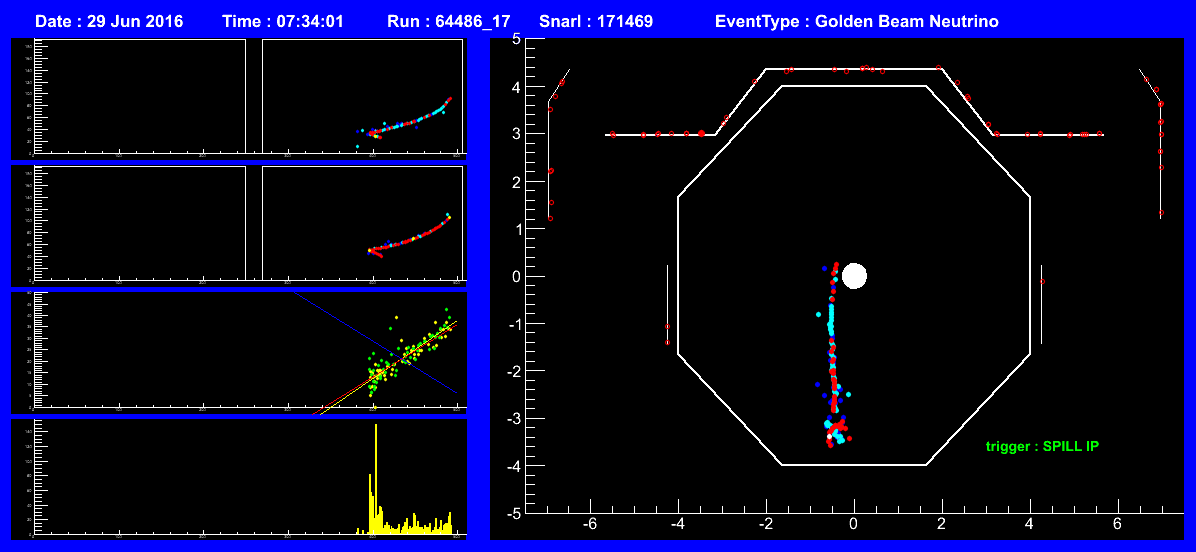

##Simulated Detections



The team first did some data analysis on $\nu_\mu$ beam energy readings from a complex MC simulation. `project1_simulation.txt` is a 20,000 entry list of those simulated energies. The MC sim assumes that the beam travels in perfectly straight paths toward the detector and is unaffected by Earth. The sim also defines neutrino energy as an ideal psuedo-random variable that does not acount for flavor oscilations.

We read in `project1_simulation.txt` as an `np.ndarray` and created a hisogram from it with 20 energy range bins (0 GeV - 20 GeV).

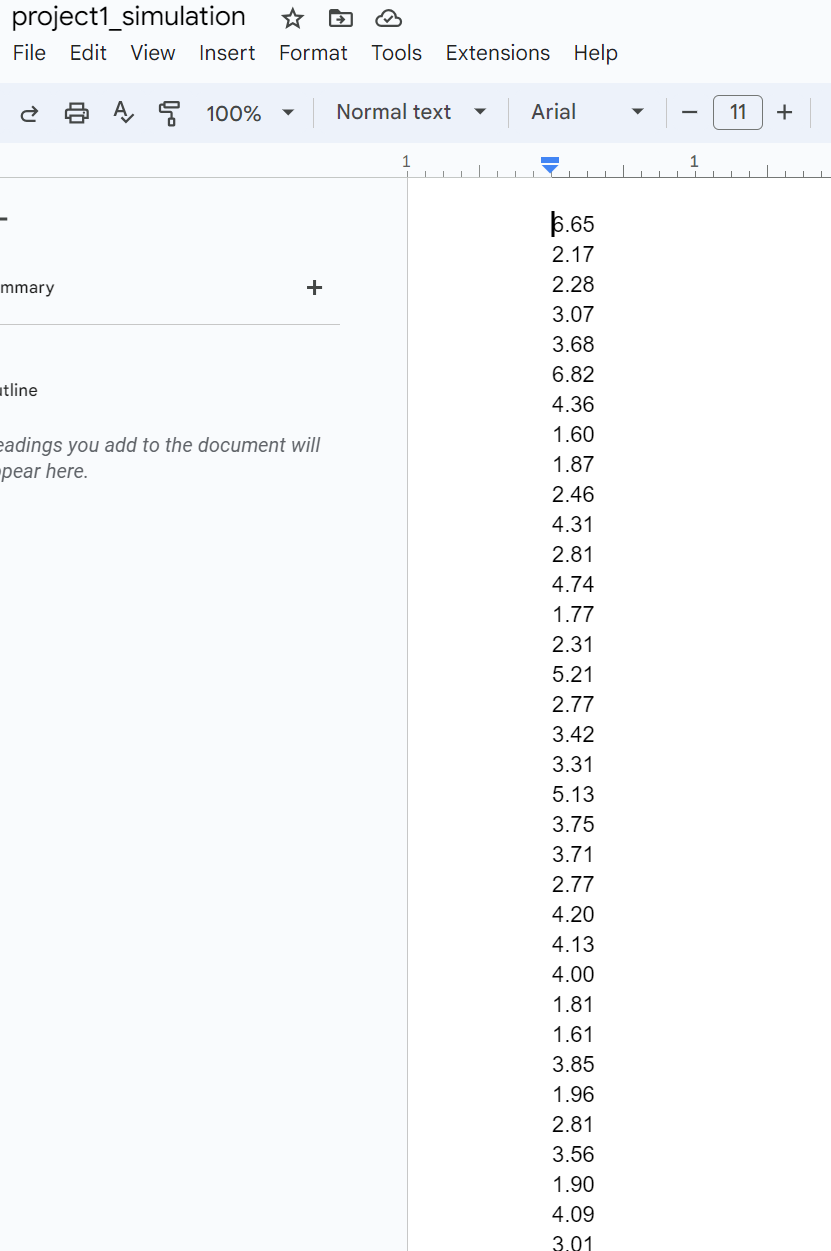

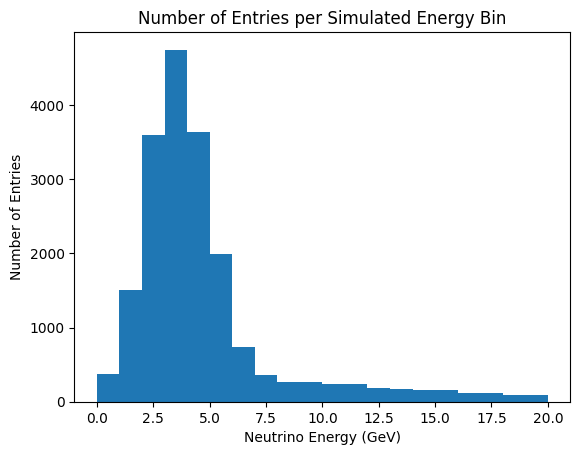

In [76]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, dummy = default()
gc = gspread.authorize(creds)

worksheet=gc.open('project_simulated').sheet1
energy_sim=np.array(worksheet.col_values(1,'UNFORMATTED_VALUE'))

mc_bins=plt.hist(energy_sim,20,(0,20))
plt.title("Number of Entries per Simulated Energy Bin")
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel("Number of Entries");

##Real Detections

We then read in a new file, `project1_data.txt,` which contains 1,339 points of real data collected from the neutrino detector in Minnesota.






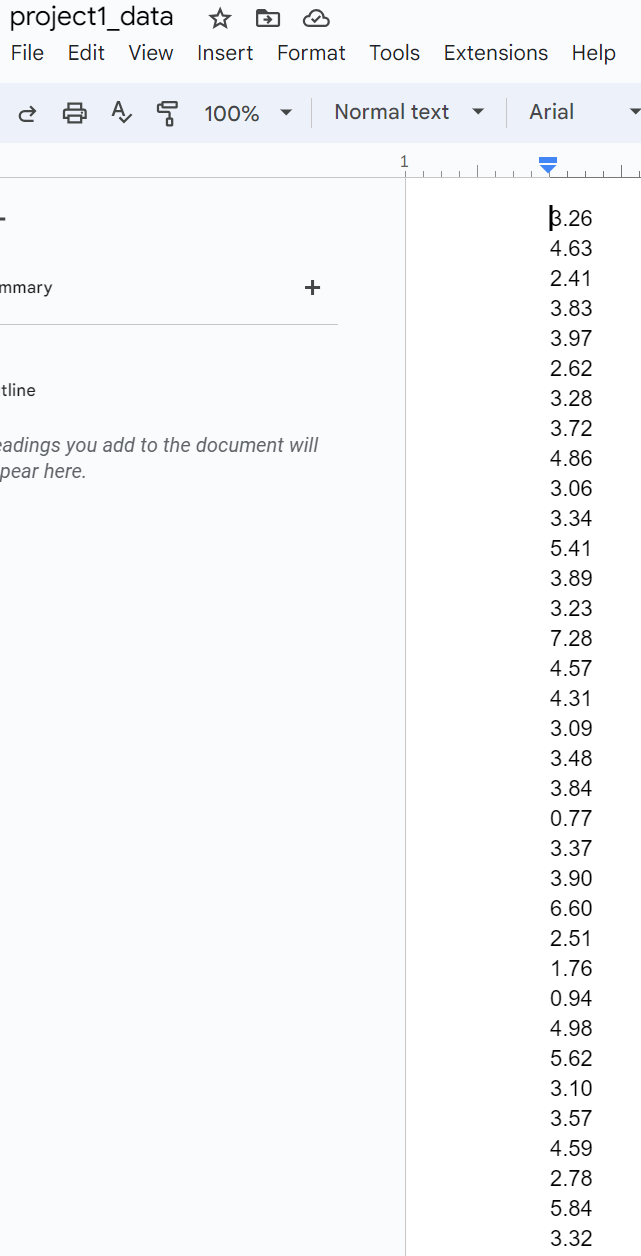

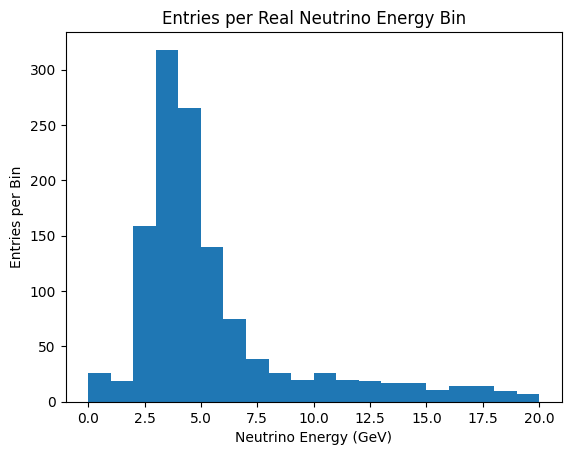

In [77]:
worksheet2=gc.open('project1_data').sheet1
energy_actual=np.array(worksheet2.col_values(1,'UNFORMATTED_VALUE'))

data_bins=plt.hist(energy_actual,20,(0,20))
plt.title("Entries per Real Neutrino Energy Bin")
plt.xlabel('Neutrino Energy (GeV)')
plt.ylabel('Entries per Bin');

# Data Difference Analysis

The histograms have distribution shape differences, which we can be better characterize by looking at the ratio of all real data bin counts over all the MC data bin counts. We made sure to plot the ratios with error bars (uncertainty $= \sqrt{counts}$).

Also note that the MC simulation timescale was 10 times longer than the real experiment. While this is useful for reducing statistical fluctuations, it also measn that we also had to divide the bin counts of the former by 10. This decision is not a perfect match-up, as `project1_simulation.txt` also has 15x more data, though it should suffice.


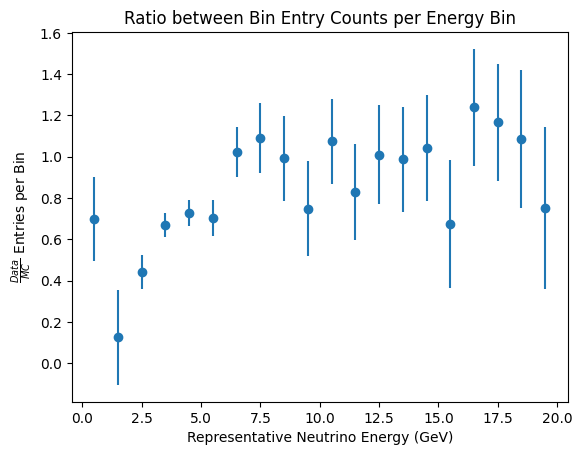

In [94]:
from numbers import Rational
data_contents=data_bins[0]
edges=data_bins[1]
mc_contents=mc_bins[0]
ratio=np.divide(data_contents,mc_contents/10)
neutrino_energy=[]
for i in range(1,len(edges)):
  neutrino_energy.append((i+(i-1))/2)
error=np.sqrt((np.sqrt(data_contents)/data_contents)**2+(np.sqrt(mc_contents)/mc_contents)**2)
plt.errorbar(neutrino_energy,ratio,error,fmt='o')
plt.xlabel('Representative Neutrino Energy (GeV)')
plt.ylabel('$\\frac{Data}{MC}$ Entries per Bin')
plt.title("Ratio between Bin Entry Counts per Energy Bin");

# Plotting Neutrino Oscillations

In order to better contenxtulize the data/MC ratio plot, we considered a two-flavor oscillation between $\nu_\mu$ and $\nu_\tau$ since the MC simulation did not consider this situation. As mentioned in the introduction, a neutrino flavor eigenstate is in a superposition of mass eigenstates that are related by a mixing angle matrix:

$$
\left[
\begin{array}{l}
\nu_\mu\\
\nu_\tau
\end{array}
\right]
=
\left[
\begin{array}{ll}
\cos\theta & \sin\theta \\
-\sin\theta & \cos\theta
\end{array}
\right]
\left[
\begin{array}{l}
\nu_1\\
\nu_2
\end{array}
\right]
$$

If we consider the $\nu_\mu$ beam to begin at the end of the decay pipe at $t=0$, we can say

$$| \nu_\mu (0) \rangle = \cos\theta |\nu_1 \rangle + \sin\theta | \nu_2 \rangle $$

By Schroedinger's equation, the general wavefunction is thus:

$$| \nu_\mu (t) \rangle =  e^{-i E_1 t}\cos\theta |\nu_1 \rangle + e^{-i E_2 t} \sin\theta | \nu_2 \rangle $$

So the probability that the $\nu_\mu$ remains in its eigenstate is:

$$ P(\nu_\mu \to \nu_\mu) = |\langle \nu_\mu (0) | \nu_\mu (t) \rangle|^{2} = \left| e^{i E_1 t}\cos^2\theta + e^{i E_2 t} \sin^2\theta \right|^2 =  1 - \sin^2 2\theta \sin^2\left(1.27 \frac{\Delta m^2 L}{E}\right)$$

where $\Delta m^2 \equiv m_2^2 - m_1^2$ in $\mathrm{eV^2}$, $L=735~\mathrm{km}$, and $E$ is neutrino energy in GeV. The energy and mass values come from the aforementioned eigenstates of its Hamiltonian $\mathcal{H}$:

$$ \mathcal{H} | \nu_1 \rangle = E_1 | \nu_1 \rangle $$
$$ \mathcal{H} | \nu_2 \rangle = E_2 | \nu_2 \rangle $$

With its rest energy equating to its mass:

$$ \mathcal{H} | \nu_1 \rangle = m_1 | \nu_1 \rangle $$
$$ \mathcal{H} | \nu_2 \rangle = m_2 | \nu_2 \rangle $$

Using the Fermilab experiment data, we plotted the oscillation formula for 4 values of $\Delta m^2$:

$$\Delta m^2 = 5\times\{10^{-4},10^{-3},10^{-2},10^{-1}\}\quad \mathrm{eV}^{2}$$

and 3 values of $\sin^2 2\theta$:

$$\sin^2 2\theta=\{0.5,0.75,1.0\}$$

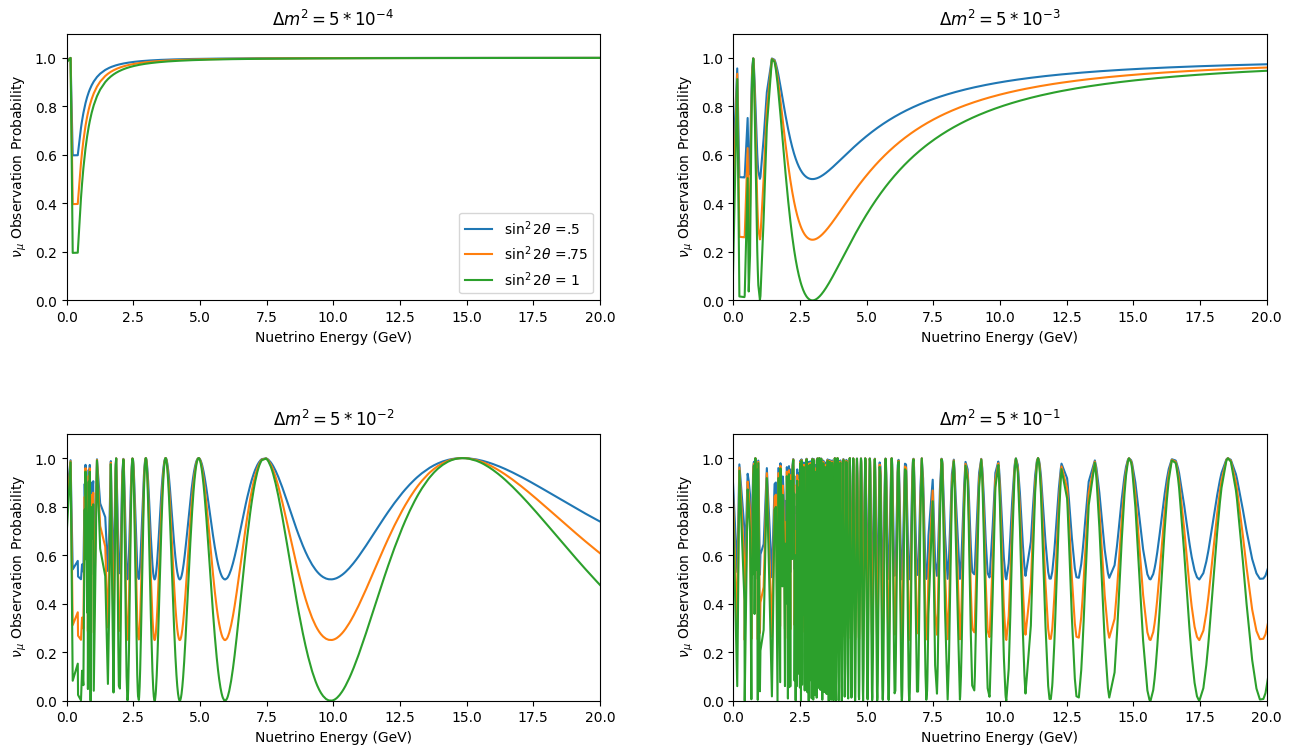

In [79]:
osc = lambda delta_m, E, sin2: 1-sin2*(np.sin((1.27*delta_m*735/E)))**2 #function to get array of survival probability values
E=np.array(sorted(energy_actual)) #sorts provided energy values into a new array
fig, axs= plt.subplots(2,2) #creates framework for 4 subplots
for i, ax in enumerate(axs.flat): #for loop that iterates through every planned subplot, each loop changing the mass
  ax.plot(E, osc((5*10**(i-4)), E, .5), E, osc((5*10**(i-4)), E, .75), E, osc((5*10**(i-4)), E, 1)) #plots 3 oscillation formulas on one plot for 3 values of sin^2(2theta)
  ax.set(xlim=(0, 20), ylim=(0, 1.1)) #limits x axis view to 20 GeV and y axis view to 100%
  ax.set_title(f"$\Delta m^2=5*10^{{{i-4}}}$") #sets title for each subplot using special characters and formatted printing for greek letters and iterable values, respectively

axs[0,0].legend(("$\sin^2 2\\theta$ =.5", "$\sin^2 2\\theta$ =.75", "$\sin^2 2\\theta$ = 1"), loc = "lower right") #creates legend for 1st plot using  greek and exponents
plt.setp(axs[:], xlabel="Nuetrino Energy (GeV)") #x axis label for all plots
plt.setp(axs[:], ylabel=" $\\nu_\mu$ Observation Probability")  #y axis label for all plots
plt.subplots_adjust(right=2, top=1.5, wspace=.25, hspace=.5) #played around with spacing to get better views of functions and labels

# Neutrino Oscillations as a LOBF via 2-DOF X^2

Oscillations clearly reduce observation probability of $\nu_\mu$----while the detector doesn't disciriminate between neutrinos, the leptons the neutrinos leave behind are differentiable. A tauon is significantly heavier than an electron, so it carries more energy upon creation. Thus, the MC simulation can be considered the energy output of a $\nu_\mu$ expierment with a 100% observation probability, while the real data considers energy fluctuations that would be  less likely for a $\nu_\mu$ due to flavor oscillation into a  $\nu_\tau$. Thus, we can plot these oscillation graphs over the data/MC ratio scatterplot to determine the change in mass and mixing angle.

##Estimating the oscillation parameters: $\chi^2$-by-eye

We first plotted the oscillation function atop the data/MC ratio and simply varied $\sin^2 2\theta$ and $\Delta m^2$ to make the curve run through the datapoints as best we could. The results provided a general idea for which parameter values to base a 2-DOF $\chi^2$ test around. From there, we could find the true LOBF via a 2-DOF $\chi^2$ distribution.

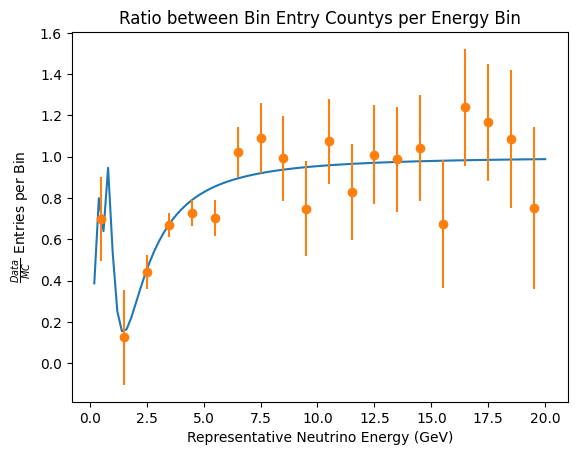

In [80]:
def P(E,sine_square,delta_m_square):
  return 1-sine_square*(np.sin(1.27*delta_m_square*735/E))**2

E=np.linspace(0,20,100)[1:]
plt.plot(E,P(E,0.85,2.5e-3))

from numbers import Rational
data_contents=data_bins[0]
edges=data_bins[1]
mc_contents=mc_bins[0]
ratio=np.divide(data_contents,mc_contents/10)
neutrino_energy=[]
for i in range(1,len(edges)):
  neutrino_energy.append((i+(i-1))/2)
error=np.sqrt((np.sqrt(data_contents)/data_contents)**2+(np.sqrt(mc_contents)/mc_contents)**2)
plt.errorbar(neutrino_energy,ratio,error,fmt='o')
plt.xlabel('Representative Neutrino Energy (GeV)');
plt.ylabel('$\\frac{Data}{MC}$ Entries per Bin');
plt.title("Ratio between Bin Entry Countys per Energy Bin");

##Compute the $\chi^2$ for a grid in $\sin^2 2\theta$ and $\Delta m^2$

We first defined a function `chi2` which computes the $\chi^2$ by taking the data/MC ratio, uncertainty vectors, and scalars $\sin^2 2\theta$ and $\Delta m^2$ as arguments. We then defined a 2d grid, with $\sin^2 2\theta$ on the x-axis and $\Delta m^2$ on the y axis and computed $\chi^2$ at each grid point. The result is displayed as a countour plot.

In [81]:
def P(E,sine_square,delta_m_square):
  return 1-sine_square*(np.sin(1.27*delta_m_square*735/E))**2
#this fixes the bug, it resulted from the difference in the order the parameters were listed in the P function

def chi2(ratio,uncertainty,sine_square,delta_m_square):
  chi_2=[]
  for i in range(0,len(ratio)):
    diff=ratio[i]-P(neutrino_energy[i],sine_square,delta_m_square)
    diff_square=diff**2/uncertainty[i]**2
    chi_2.append(diff_square)

  sum_chi_2=sum(chi_2)
  return sum_chi_2

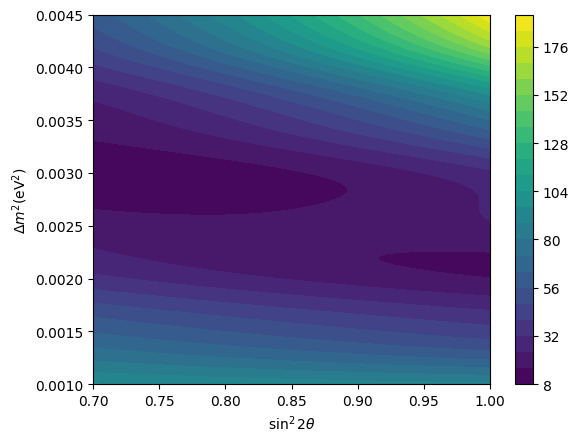

In [82]:
x_axis=np.linspace(0.7,1,100)         #determine range of sine_square on x axis
y_axis=np.linspace(1e-3,4.5e-3,100)       #determine range of delta_m_square on y axis
x_grid,y_grid=np.meshgrid(x_axis,y_axis)
uncertainty=error
nlevels=24
z=chi2(ratio,uncertainty,x_grid,y_grid)
cs=plt.contourf(x_grid,y_grid,z, nlevels)
cbar=plt.colorbar(cs)
plt.xlabel("$\sin^2 2\\theta$")
plt.ylabel("$\Delta m^2 (\mathrm{eV}^{2})$");

##Minimum $\chi^2$ and a fit

We then minimized the $\chi^2$ contour plot and its location in the plane to identify the best-fit parameters and their uncertainties.

Sin^2(2theta) = 0.7846123804353607 +/- 0.10854365805164295)
Delta m^2 = 0.002968502896972016 +/- 0.00010521496834035746
chi^2_BF = 11.515966864925119


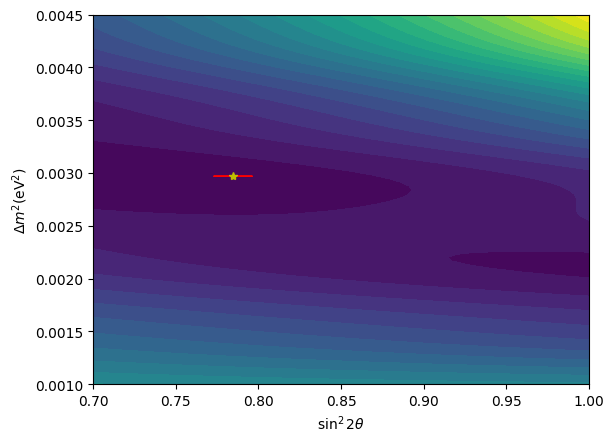

In [83]:
initialparameters=[0.85,2.5e-3]
finalparameters, finalparametererrors=optimize.curve_fit(P,neutrino_energy,ratio,initialparameters)
chi2_BF=chi2(ratio,uncertainty,finalparameters[0],finalparameters[1])
ax=plt.gca()
cs=plt.contourf(x_grid,y_grid,z, nlevels)
plt.plot(finalparameters[0],finalparameters[1], '*y')
# Create the ellipse
ellipse = Ellipse((finalparameters[0], finalparameters[1]), width=2*finalparametererrors[0,0], height=2*finalparametererrors[1,1], edgecolor='r', facecolor='none')
ax.add_patch(ellipse)
print(f"Sin^2(2theta) = {finalparameters[0]} +/- {np.sqrt(finalparametererrors[0,0])})")
print(f"Delta m^2 = {finalparameters[1]} +/- {np.sqrt(finalparametererrors[1,1])}")
print(f"chi^2_BF = {chi2_BF}")
plt.xlabel("$\sin^2 2\\theta$")
plt.ylabel("$\Delta m^2 (\mathrm{eV}^{2})$");



##Plot the best fit

We finally plotted the oscillation formula with the best fit parameters atop the data/MC ratio.

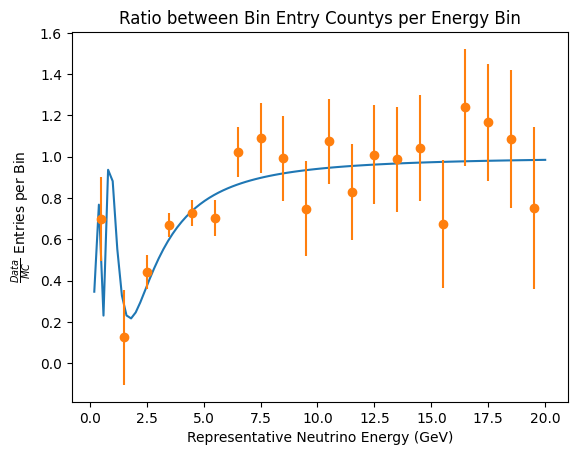

In [84]:
plt.plot(E,P(E,finalparameters[0],finalparameters[1]))

from numbers import Rational
data_contents=data_bins[0]
edges=data_bins[1]
mc_contents=mc_bins[0]
ratio=np.divide(data_contents,mc_contents/10)
neutrino_energy=[]
for i in range(1,len(edges)):
  neutrino_energy.append((i+(i-1))/2)
error=np.sqrt((np.sqrt(data_contents)/data_contents)**2+(np.sqrt(mc_contents)/mc_contents)**2)
plt.errorbar(neutrino_energy,ratio,error,fmt='o')
plt.xlabel('Representative Neutrino Energy (GeV)')
plt.ylabel('$\\frac{Data}{MC}$ Entries per Bin')
plt.title("Ratio between Bin Entry Countys per Energy Bin");

#Better Uncertainties

## 2-DOF Confidence Intervals

It is important to factor in confidence intervals to visually see the uncertainties better. We began by plotting $\Delta \chi^2 = \chi^2 - \chi^2_{best fit}$. Found [here](https://faculty.washington.edu/heagerty/Books/Biostatistics/TABLES/ChiSquare.pdf), the respective $\Delta \chi^2$ values for 68%, 90%, and 95% are 2.30, 4.61, and 5.99.

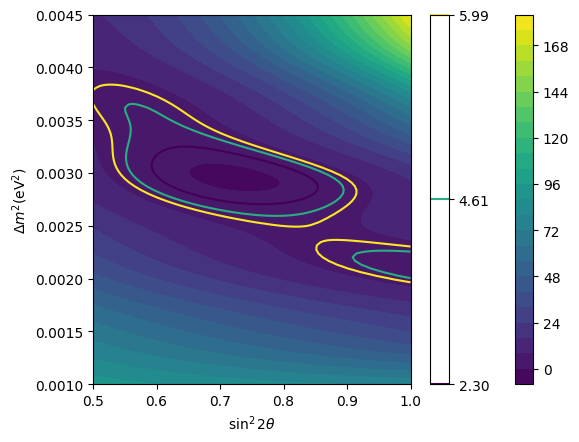

In [85]:
x_axis=np.linspace(0.5,1,100)
y_axis=np.linspace(1e-3,4.5e-3,100)
x_grid,y_grid=np.meshgrid(x_axis,y_axis)
uncertainty=error
deltaz=chi2(ratio,uncertainty,x_grid,y_grid)-chi2_BF
cs=plt.contourf(x_grid,y_grid,deltaz,nlevels)
cbar=plt.colorbar(cs)
ccs=plt.contour(x_grid,y_grid,deltaz, [2.30,4.61,5.99])
ccbar=plt.colorbar(ccs)
plt.xlabel("$\sin^2 2\\theta$")
plt.ylabel("$\Delta m^2 (\mathrm{eV}^{2})$");

##Systematic Uncertainties via optimize_curvefit

Our method for using optimize_curvefit to find the LOBF can also be used to account for systematic uncertainties like instrument malfunctions. These results leave room for $\chi^2$ tests. The team considered four scenarios:
* Assume all neutrino energy was undermeasured by 5%

* Assume all neutrino energy was overmeasured by 5%

* Assume the detector undercounted the neutrinos by 3%

* Assume the detector overcounted the neutrinos by 3%

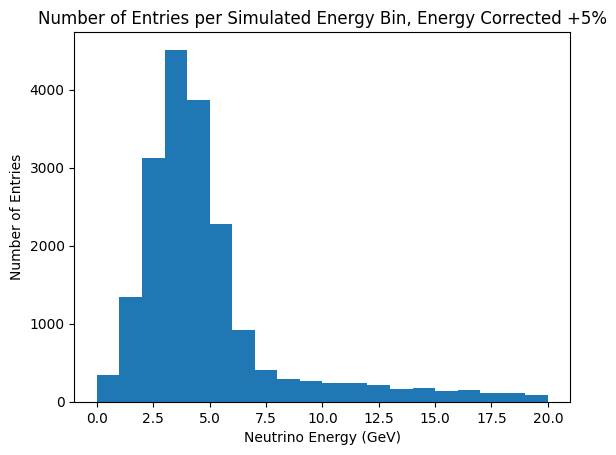

In [86]:
# energy shifted upwards by 5%
energy_sim_over=[]
for i in energy_sim:
  energy_sim_over.append(i*1.05)
mc_over_bins=plt.hist(energy_sim_over,20,(0,20))
plt.title("Number of Entries per Simulated Energy Bin, Energy Corrected +5%")
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel("Number of Entries");

Sin^2(2theta) = 0.7928247157134063 +/- 0.0947917963186306
Delta m^2 = 0.00301347618308901 +/- 9.210602620193974e-05
Change in sin^2(2theta) = 0.008212337316251483
Change in Delta m^2 = 4.49732867392064e-05


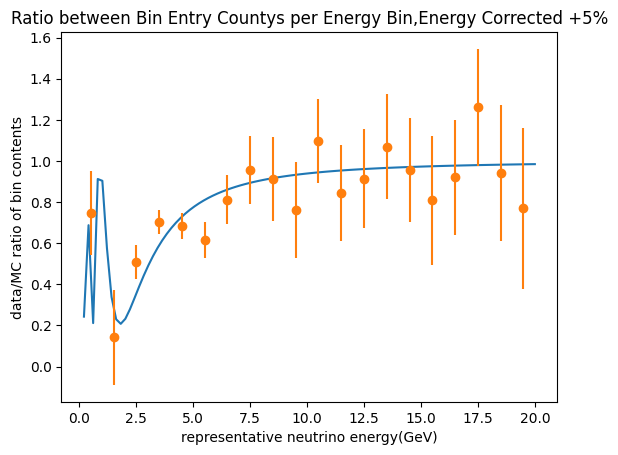

In [87]:
from numbers import Rational
data_contents=data_bins[0]
edges=data_bins[1]
mc_over_contents=mc_over_bins[0]
over_ratio=np.divide(data_contents,mc_over_contents/10)
neutrino_energy1=[]
for i in range(1,len(edges)):
  neutrino_energy1.append((i+(i-1))/2)
over_error=np.sqrt((np.sqrt(data_contents)/data_contents)**2+(np.sqrt(mc_over_contents)/mc_over_contents)**2)
initialparameters=[0.85,2.5e-3]
finalparameters, finalparametererrors=optimize.curve_fit(P,neutrino_energy1,over_ratio,initialparameters)
plt.plot(E,P(E,finalparameters[0],finalparameters[1]))
plt.errorbar(neutrino_energy1,over_ratio,over_error,fmt='o')
plt.xlabel('representative neutrino energy(GeV)')
plt.ylabel('data/MC ratio of bin contents')
plt.title("Ratio between Bin Entry Countys per Energy Bin,Energy Corrected +5%");

print(f"Sin^2(2theta) = {finalparameters[0]} +/- {np.sqrt(finalparametererrors[0,0])}")
print(f"Delta m^2 = {finalparameters[1]} +/- {np.sqrt(finalparametererrors[1,1])}")

print(f"Change in sin^2(2theta) = {finalparameters[0]-0.7846123783971548}")
print(f"Change in Delta m^2 = {finalparameters[1]-0.0029685028963498034}");

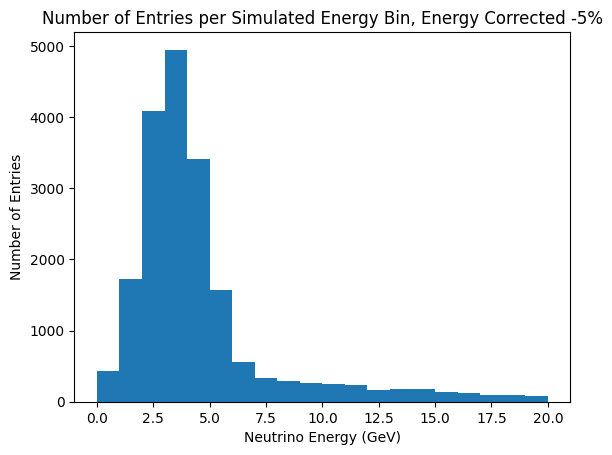

In [88]:
# energy shifted downwards by 5%
energy_sim=np.array(worksheet.col_values(1,'UNFORMATTED_VALUE'))
energy_sim_under=[]
for i in energy_sim:
  energy_sim_under.append(i*0.95)
mc_under_bins=plt.hist(energy_sim_under,20,(0,20))
plt.title("Number of Entries per Simulated Energy Bin, Energy Corrected -5%")
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel("Number of Entries");

Sin^2(2theta) = 1.0199119978846918 +/- 0.19849251627203568
Delta m^2 = 0.002043979414406924 +/- 0.00011765606326895202
Change in sin^2(2theta) = 0.23529961948753697
Change in Delta m^2 = -0.0009245234819428793


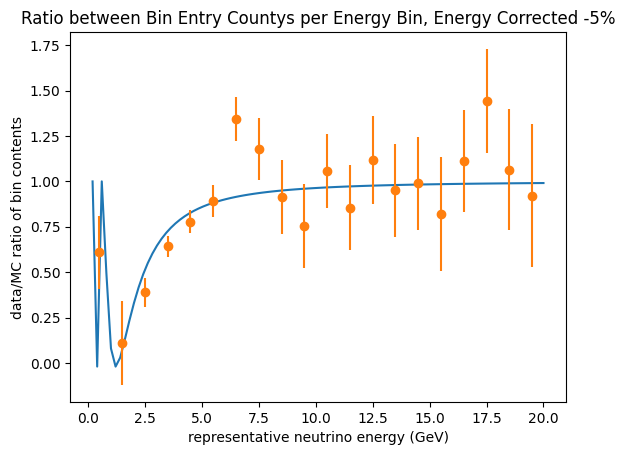

In [89]:
data_contents=data_bins[0]
edges=data_bins[1]
mc_under_contents=mc_under_bins[0]
under_ratio=np.divide(data_contents,mc_under_contents/10)
neutrino_energy2=[]
for i in range(1,len(edges)):
  neutrino_energy2.append((i+(i-1))/2)
under_error=np.sqrt((np.sqrt(data_contents)/data_contents)**2+(np.sqrt(mc_under_contents)/mc_under_contents)**2)
initialparameters=[0.85,2.5e-3]
finalparameters, finalparametererrors=optimize.curve_fit(P,neutrino_energy2,under_ratio,initialparameters)
plt.plot(E,P(E,finalparameters[0],finalparameters[1]))
plt.errorbar(neutrino_energy2,under_ratio,under_error,fmt='o')
plt.xlabel('representative neutrino energy (GeV)')
plt.ylabel('data/MC ratio of bin contents')
plt.title("Ratio between Bin Entry Countys per Energy Bin, Energy Corrected -5%");

print(f"Sin^2(2theta) = {finalparameters[0]} +/- {np.sqrt(finalparametererrors[0,0])}")
print(f"Delta m^2 = {finalparameters[1]} +/- {np.sqrt(finalparametererrors[1,1])}")

print(f"Change in sin^2(2theta) = {finalparameters[0]-0.7846123783971548}")
print(f"Change in Delta m^2 = {finalparameters[1]-0.0029685028963498034}");

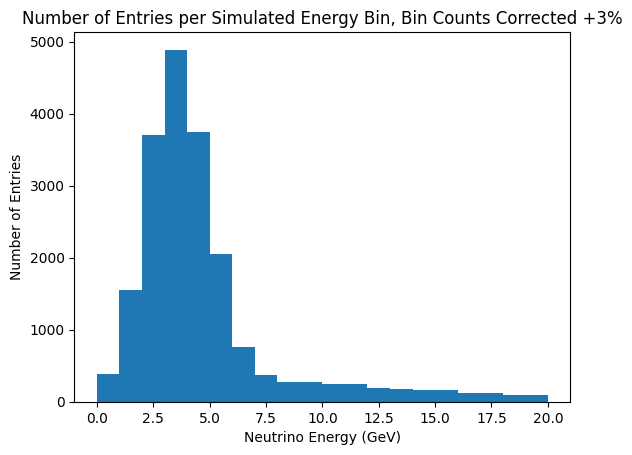

In [90]:
weights = np.ones_like(energy_sim_over) * 1.03
data_bins_over=plt.hist(energy_sim,20,(0,20), weights=weights)
plt.title("Number of Entries per Simulated Energy Bin, Bin Counts Corrected +3%")
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel("Number of Entries");

Sin^2(2theta) = 0.8170920411464165 +/- 0.10443049546613574
Delta m^2 = 0.002972766314056406 +/- 9.720152097612069e-05
Change in sin^2(2theta) = 0.03247966274926173
Change in Delta m^2 = 4.26341770660239e-06


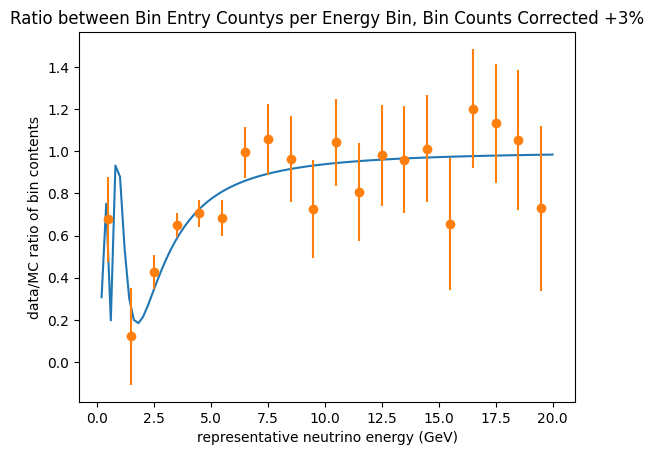

In [91]:
data_contents=data_bins[0]
edges=data_bins[1]
mc_contents_over=data_bins_over[0]
data_over_ratio=np.divide(data_contents,mc_contents_over/10)
neutrino_energy3=[]
for i in range(1,len(edges)):
  neutrino_energy3.append((i+(i-1))/2)
error=np.sqrt((np.sqrt(data_contents)/data_contents)**2+(np.sqrt(mc_contents_over)/mc_contents_over)**2)
finalparameters, finalparametererrors=optimize.curve_fit(P,neutrino_energy3,data_over_ratio,initialparameters)
plt.plot(E,P(E,finalparameters[0],finalparameters[1]))
plt.errorbar(neutrino_energy3,data_over_ratio,error,fmt='o')
plt.xlabel('representative neutrino energy (GeV)')
plt.ylabel('data/MC ratio of bin contents')
plt.title("Ratio between Bin Entry Countys per Energy Bin, Bin Counts Corrected +3%");

print(f"Sin^2(2theta) = {finalparameters[0]} +/- {np.sqrt(finalparametererrors[0,0])}")
print(f"Delta m^2 = {finalparameters[1]} +/- {np.sqrt(finalparametererrors[1,1])}")

print(f"Change in sin^2(2theta) = {finalparameters[0]-0.7846123783971548}")
print(f"Change in Delta m^2 = {finalparameters[1]-0.0029685028963498034}");

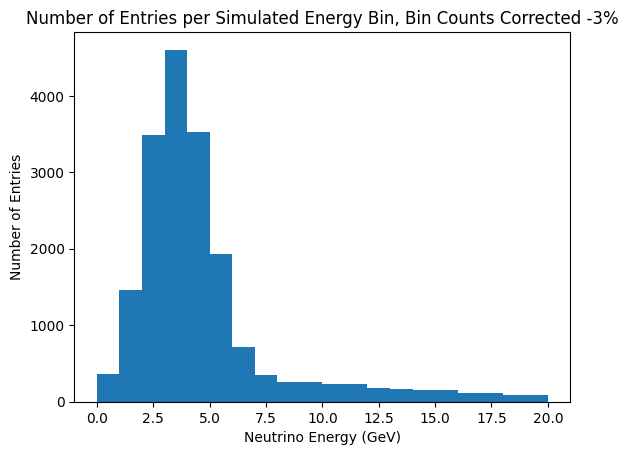

In [92]:
weights = np.ones_like(energy_sim_over) * 0.97
data_bins_under=plt.hist(energy_sim,20,(0,20), weights=weights)
plt.title("Number of Entries per Simulated Energy Bin, Bin Counts Corrected -3%")
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel("Number of Entries");

Sin^2(2theta) = 0.7501530110801472 +/- 0.11560502620831165
Delta m^2 = 0.002963688564345117 +/- 0.00011724444475175024
Change in sin^2(2theta) = -0.034459367317007605
Change in Delta m^2 = -4.81433200468645e-06


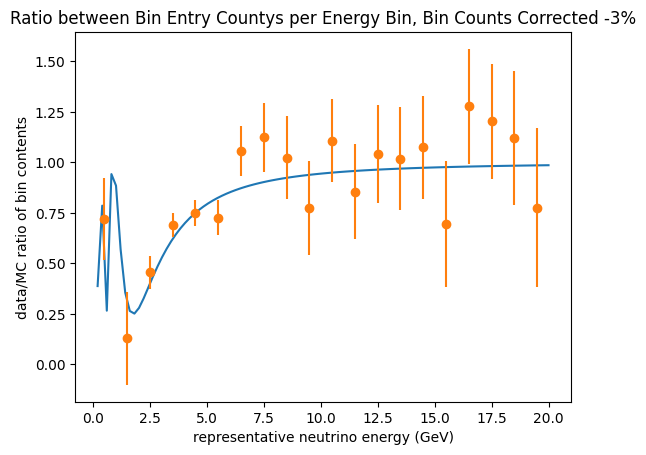

In [93]:
data_contents=data_bins[0]
edges=data_bins[1]
mc_under_contents=data_bins_under[0]
data_under_ratio=np.divide(data_contents,mc_under_contents/10)
neutrino_energy4=[]
for i in range(1,len(edges)):
  neutrino_energy4.append((i+(i-1))/2)
error=np.sqrt((np.sqrt(data_contents)/data_contents)**2+(np.sqrt(mc_under_contents)/mc_under_contents)**2)
finalparameters, finalparametererrors=optimize.curve_fit(P,neutrino_energy4,data_under_ratio,initialparameters)
plt.plot(E,P(E,finalparameters[0],finalparameters[1]))
plt.errorbar(neutrino_energy4,data_under_ratio,error,fmt='o')
plt.xlabel('representative neutrino energy (GeV)')
plt.ylabel('data/MC ratio of bin contents')
plt.title("Ratio between Bin Entry Countys per Energy Bin, Bin Counts Corrected -3%");

print(f"Sin^2(2theta) = {finalparameters[0]} +/- {np.sqrt(finalparametererrors[0,0])}")
print(f"Delta m^2 = {finalparameters[1]} +/- {np.sqrt(finalparametererrors[1,1])}")

print(f"Change in sin^2(2theta) = {finalparameters[0]-0.7846123783971548}")
print(f"Change in Delta m^2 = {finalparameters[1]-0.0029685028963498034}");